In [ ]:
!pip install torchdiffeq

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchdiffeq import odeint

# ================================
# Ground Truth Spiral System
# ================================
class SpiralSystem(nn.Module):
    def forward(self, t, x):
        x1, x2 = x[:, 0], x[:, 1]
        dx1 = -0.1 * x1 - x2
        dx2 = x1 - 0.1 * x2
        return torch.stack([dx1, dx2], dim=1)


# ================================
# Generate Training Data
# ================================
torch.manual_seed(0)

true_dynamics = SpiralSystem()
t = torch.linspace(0., 10., 100)

x0 = torch.tensor([[2.0, 0.0]])
true_traj = odeint(true_dynamics, x0, t)

# ================================
# Neural ODE Model
# ================================
class ODEFunc(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 2)
        )

    def forward(self, t, x):
        return self.net(x)


class NeuralODE(nn.Module):
    def __init__(self):
        super().__init__()
        self.func = ODEFunc()

    def forward(self, x0, t):
        return odeint(self.func, x0, t)


# ================================
# Training
# ================================
model = NeuralODE()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

for epoch in range(500):
    optimizer.zero_grad()

    pred_traj = model(x0, t)
    loss = loss_fn(pred_traj, true_traj)

    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch:03d} | Loss: {loss.item():.6f}")

# ================================
# Evaluation
# ================================
with torch.no_grad():
    learned_traj = model(x0, t)

print("Training completed.")


Epoch 000 | Loss: 2.772079
Epoch 020 | Loss: 0.581091
Epoch 040 | Loss: 0.341039
Epoch 060 | Loss: 0.710622
Epoch 080 | Loss: 0.658891
Epoch 100 | Loss: 0.458817
Epoch 120 | Loss: 0.044591
Epoch 140 | Loss: 0.008273
Epoch 160 | Loss: 0.002729
Epoch 180 | Loss: 0.001642
Epoch 200 | Loss: 0.001250
Epoch 220 | Loss: 0.001102
Epoch 240 | Loss: 0.000994
Epoch 260 | Loss: 0.000898
Epoch 280 | Loss: 0.000810
Epoch 300 | Loss: 0.000730
Epoch 320 | Loss: 0.000657
Epoch 340 | Loss: 0.000591
Epoch 360 | Loss: 0.000531
Epoch 380 | Loss: 0.000477
Epoch 400 | Loss: 0.000428
Epoch 420 | Loss: 0.000384
Epoch 440 | Loss: 0.000344
Epoch 460 | Loss: 0.000308
Epoch 480 | Loss: 0.000275
Training completed.


In [ ]:
import torch

# Define the path to save the model
model_save_path = 'neural_ode_model_example2.pth'

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved successfully to {model_save_path}")

Model saved successfully to neural_ode_model_example2.pth


In [ ]:
import torch

# Define the path from which to load the model
model_load_path = 'neural_ode_model_example2.pth'

# Instantiate the model architecture (NeuralODE, which includes ODEFunc)
# Ensure the ODEFunc and NeuralODE classes are defined in the current session (they are in K0MhBwzE0o7L)
loaded_model = NeuralODE()

# Load the saved state dictionary
loaded_model.load_state_dict(torch.load(model_load_path))

# Set the model to evaluation mode
loaded_model.eval()

print(f"Model loaded successfully from {model_load_path}")

Model loaded successfully from neural_ode_model_example2.pth


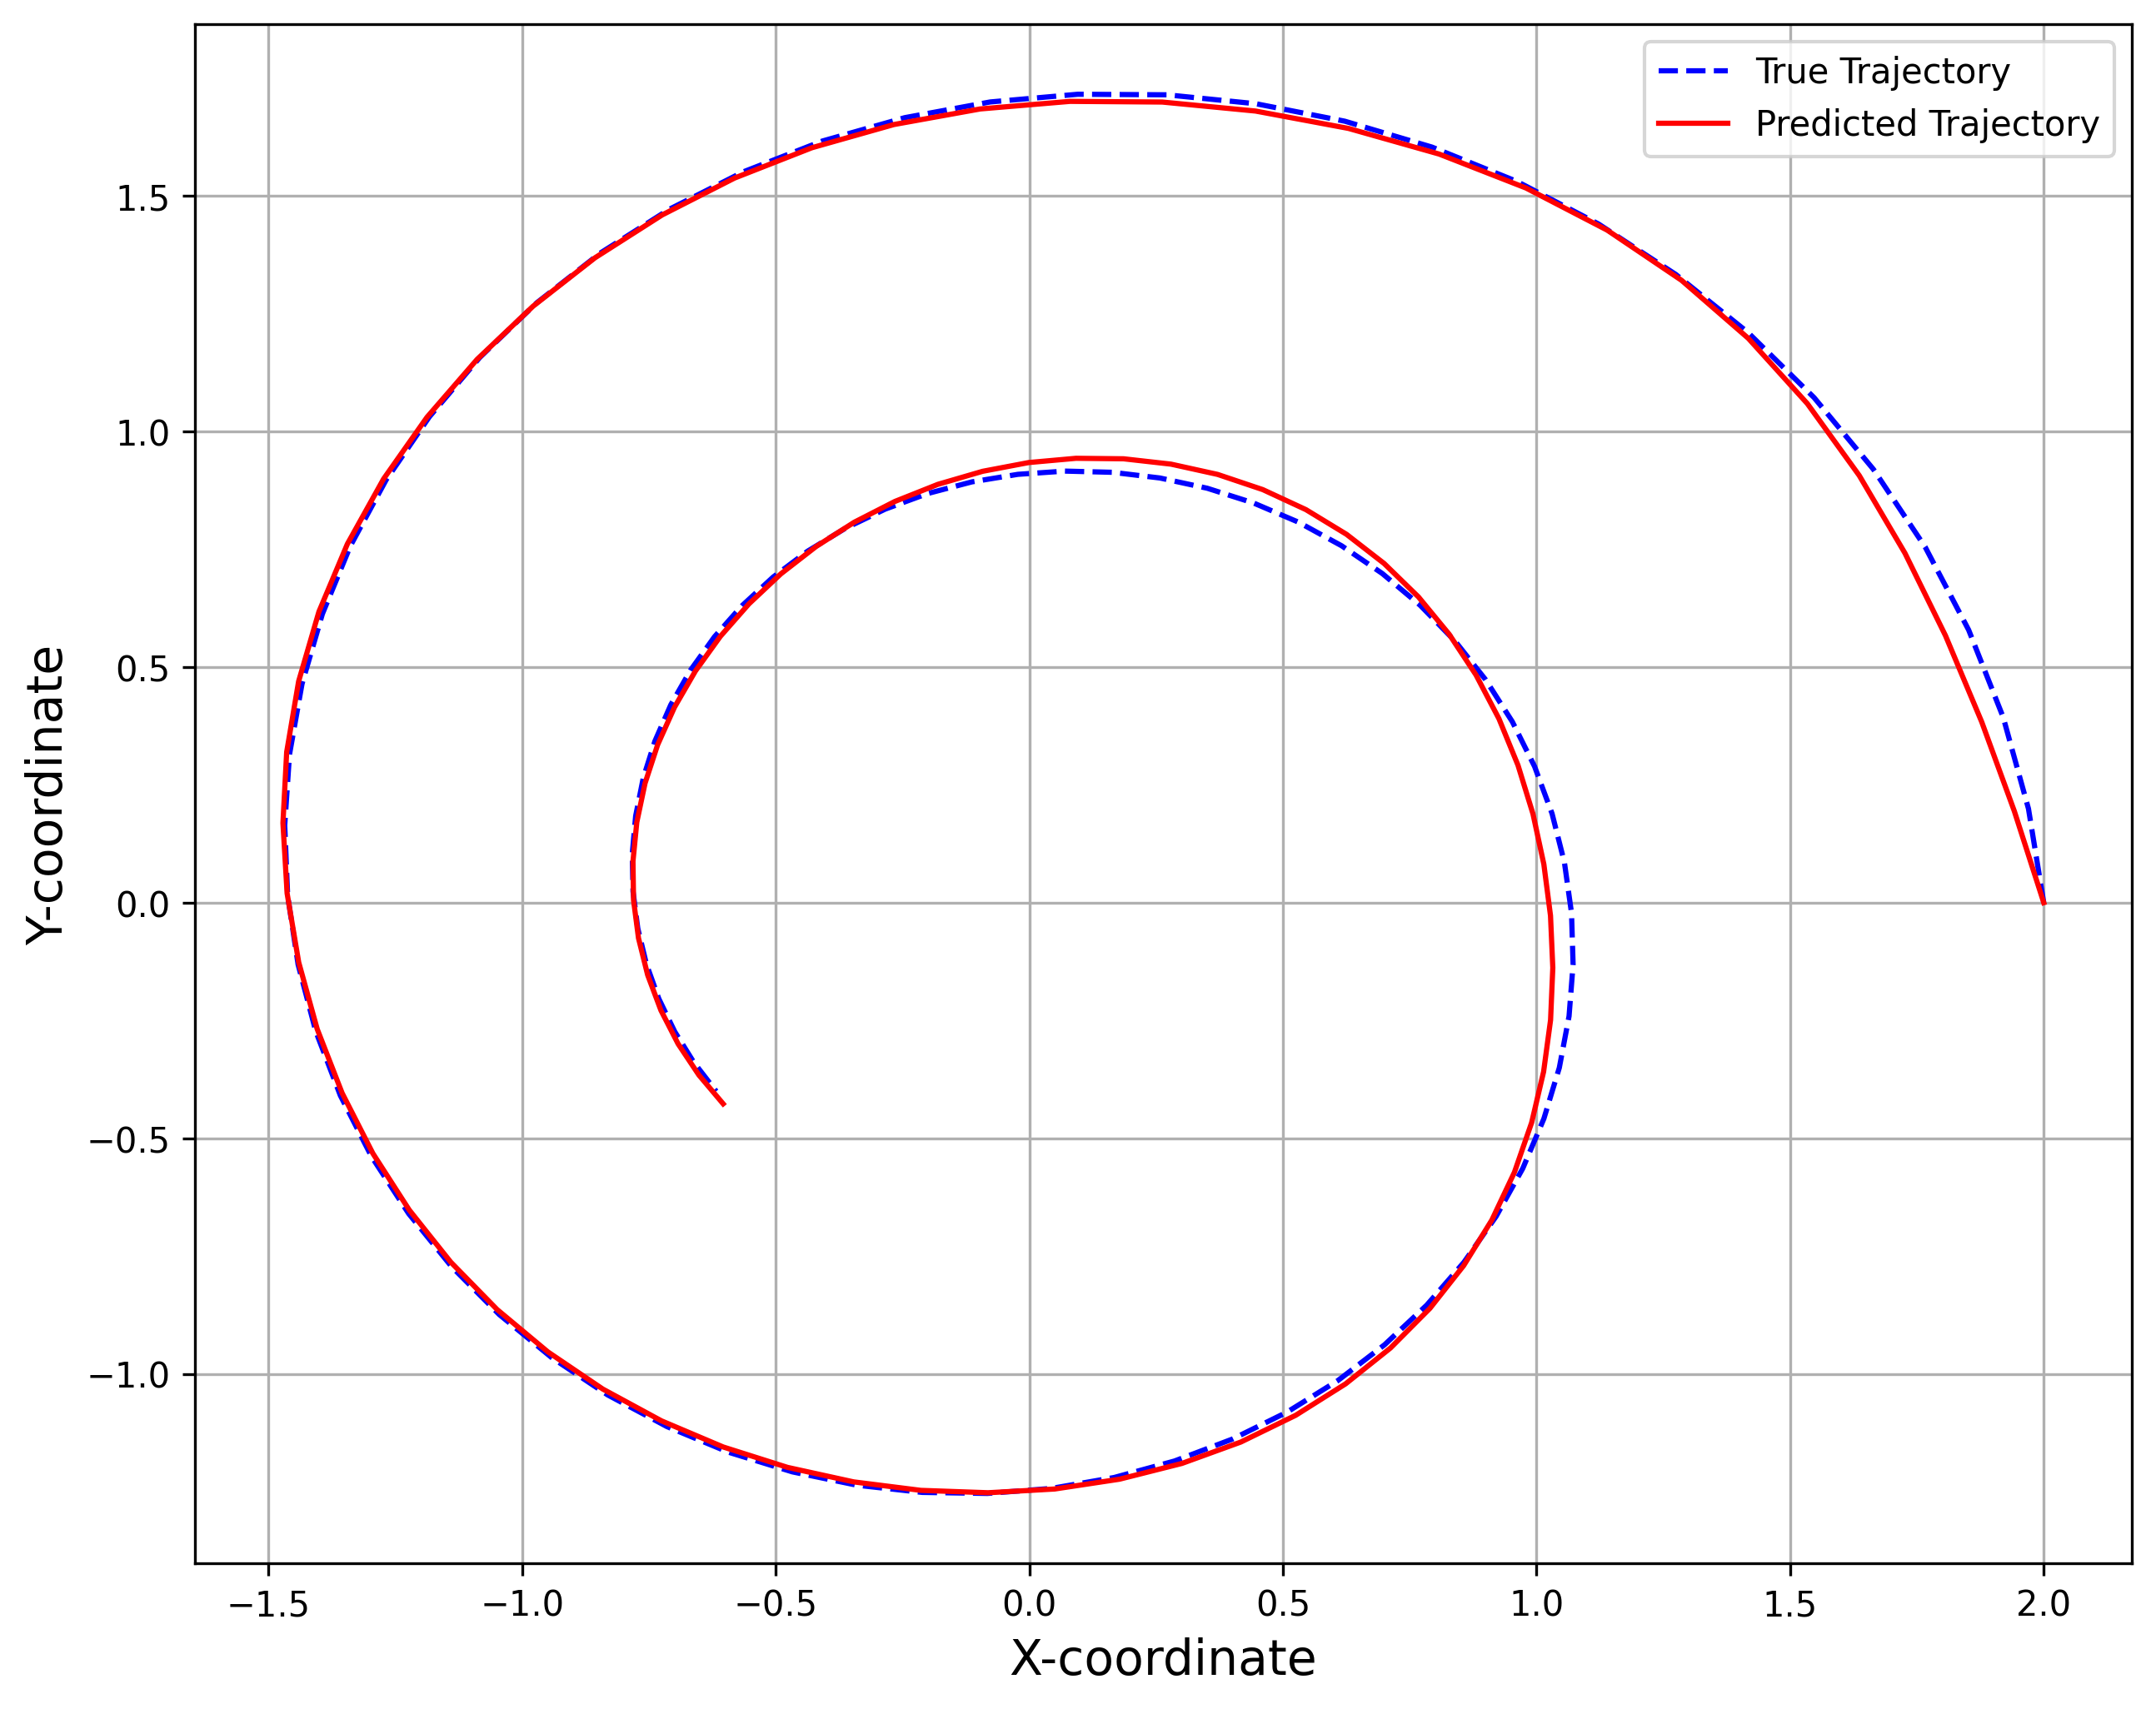

In [ ]:
import matplotlib.pyplot as plt

# Convert tensors to NumPy arrays
# Squeeze is used to remove singleton dimensions, making it (num_points, 2)
true_traj_np = true_traj.squeeze().numpy()
learned_traj_np = learned_traj.squeeze().numpy()

# Create a 2D plot
plt.figure(figsize=(10, 8), dpi = 300)

# Plot the true trajectory
plt.plot(true_traj_np[:, 0], true_traj_np[:, 1], label='True Trajectory', color='blue', linestyle='--')

# Plot the predicted trajectory
plt.plot(learned_traj_np[:, 0], learned_traj_np[:, 1], label='Predicted Trajectory', color='red', linestyle='-')

# Add title and labels
#plt.title('True vs. Predicted Trajectory')
plt.xlabel('X-coordinate', fontsize = 14)
plt.ylabel('Y-coordinate', fontsize = 14)

# Add a legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()

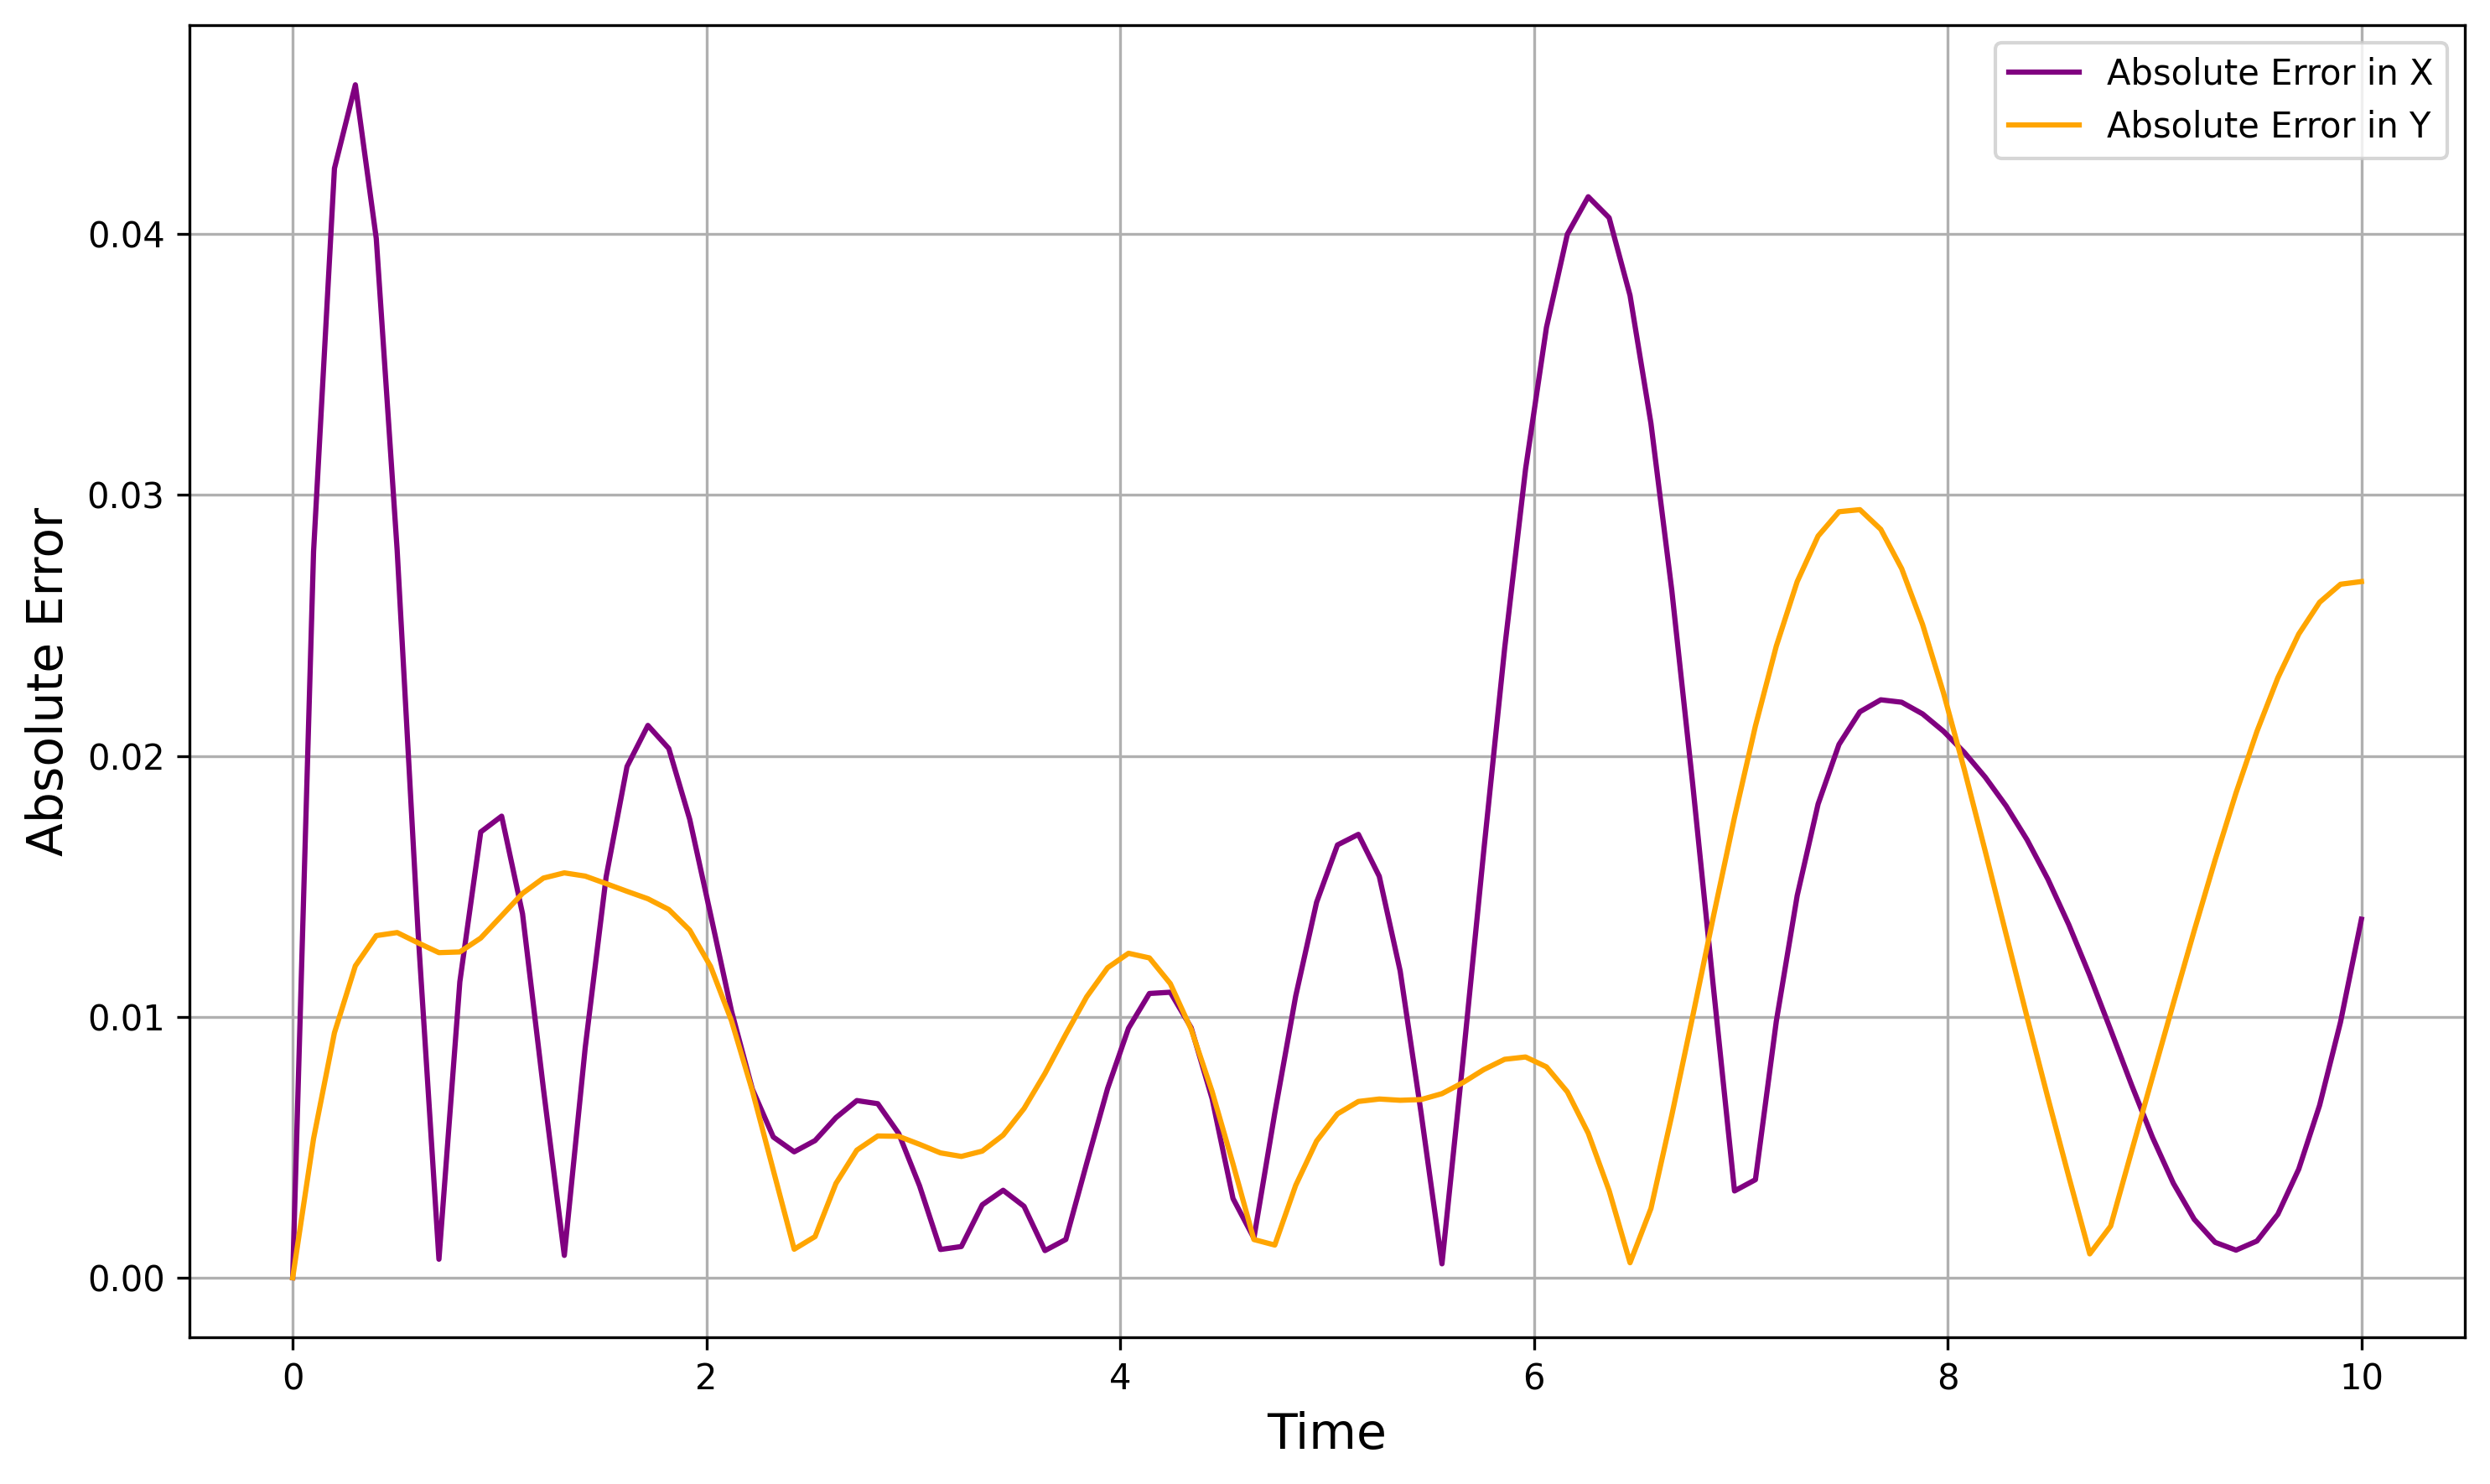

In [ ]:
import matplotlib.pyplot as plt

# 1. Convert the t (time) tensor to a NumPy array
t_np = t.numpy()

# 2. Calculate the absolute difference between true_traj_np and learned_traj_np
absolute_error = np.abs(true_traj_np - learned_traj_np)

# 3. Create a figure for a single plot
plt.figure(figsize=(10, 6), dpi = 300)

# 4. Plot both x and y components of absolute_error against the time array on the same axes
plt.plot(t_np, absolute_error[:, 0], label='Absolute Error in X', color='purple')
plt.plot(t_np, absolute_error[:, 1], label='Absolute Error in Y', color='orange')

#plt.title('Absolute Error in Trajectory Components Over Time', fontsize = 14)
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Absolute Error', fontsize = 14)
plt.legend()
plt.grid(True)

# 5. Display the plot
plt.tight_layout()
plt.show()